## Classification d’Images

# 1.Expliquons le problème d’apprentissage

Le problème d'apprentissage est un problème de classification pour reconnaître des images de chiffres manuscrits, de 0 à 9.

# 2.Présenter le dataset à travers une exploration bien structurée et commenter

In [23]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause
# Standard scientific Python imports
import matplotlib.pyplot as plt
import pandas as pd
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
import seaborn as sns
from sklearn.model_selection import train_test_split

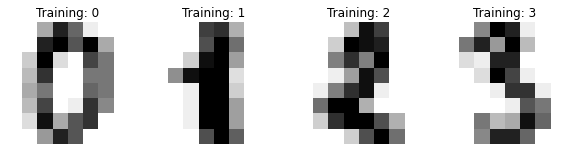

In [10]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target_names):
#     ax.set_axis_on()
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
#     interpolaton = quadratic ou none

In [4]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
c = pd.DataFrame(digits.target)
c

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [12]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [30]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [25]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

(1797, 64)


<Figure size 432x288 with 0 Axes>

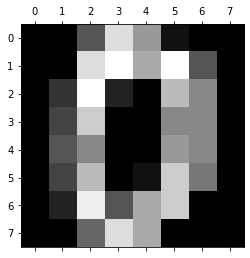

In [14]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
print(digits.data.shape)
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [49]:
#Reshape : donne une nouvelle forme à un tableau sans modifier ses données.
image

array([[ 0.,  0.,  1., 10., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 14., 11.,  3.,  0.,  0.],
       [ 0.,  0., 16.,  2.,  2.,  0.,  0.,  0.],
       [ 0.,  3., 13.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  4., 13.,  0.,  6., 10.,  3.,  0.],
       [ 0.,  3., 15., 13., 12., 10., 12.,  0.],
       [ 0.,  0., 10., 16.,  4.,  5., 14.,  0.],
       [ 0.,  0.,  0.,  9., 15., 14.,  9.,  0.]])

In [82]:
image.reshape(8,8)

array([[ 0.,  0.,  1., 10., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 14., 11.,  3.,  0.,  0.],
       [ 0.,  0., 16.,  2.,  2.,  0.,  0.,  0.],
       [ 0.,  3., 13.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  4., 13.,  0.,  6., 10.,  3.,  0.],
       [ 0.,  3., 15., 13., 12., 10., 12.,  0.],
       [ 0.,  0., 10., 16.,  4.,  5., 14.,  0.],
       [ 0.,  0.,  0.,  9., 15., 14.,  9.,  0.]])

In [21]:
iris = datasets.load_iris()
data = pd.DataFrame(digits.data, columns = digits.feature_names)
data['target']=digits.target
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [26]:
# plt.figure(10)
# sns.heatmap(data.corr(), annot= True)
# plt.title('Correlation sur les données')

In [35]:
data.shape

(1797, 65)

In [28]:
data.isnull()

In [30]:
data.describe()

In [32]:
data.info()

In [39]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [43]:
n_samples

1797

In [47]:
data_1

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

Un exemple d'élimination de caractéristiques récursives montrant la pertinence des pixels dans une tâche de classification de chiffres.

In [56]:
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, confusion_matrix, f1_score
# flatten the images (aplatir(rendre plat) les images)
#samples (échatillons)
n_samples = len(digits.images)
data_1 = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data_1, digits.target, test_size=0.5, shuffle=False
)
# Learn the digits on the train subset
clf.fit(X_train, y_train)
yhat= clf.predict(X_test)
mse = mean_squared_error(y_test, yhat)
score = clf.score(X_test, y_test)
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
print(score)
print(mse)

0.9688542825361512
0.60734149054505


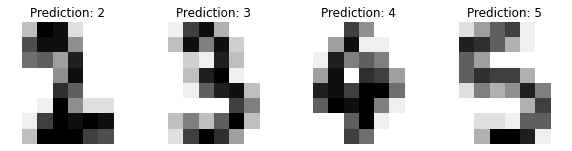

In [55]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [57]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Qu’est ce qui différencie ce dataset de ceux que nous avons déjà manipuler


Ce jeu de données est composé de 1797 images 8x8.
Chaque image, comme celle montrée ci-dessous, est d'un chiffre écrit à la main. Pour utiliser une figure 8x8 comme celle-ci, nous devons d'abord la transformer en un vecteur de caractéristiques de longueur 64.

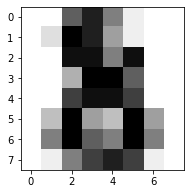

In [73]:
from sklearn import datasets

import matplotlib.pyplot as plt

# Load the digits dataset
digits = datasets.load_digits()

# Display the last digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

Ces ensembles de données se composent de 3 types différents de longueurs de pétales et de sépales d'iris (Setosa, Versicolor et Virginica), stockés dans un numpy.ndarray de 150x4

# 3.Donner les détails de la phase d’apprentissage:

-Algo d’apprentissage

classification image